In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [36]:
import seaborn as sns


In [37]:
data=pd.read_csv("creditcard.csv")

In [38]:
#explore the dataset
data.columns #looks like PCA dimensionality reductionp


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [39]:
print(data.shape)

(284807, 31)


In [40]:
print(data.describe )

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [41]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [42]:
data=data.sample(frac=0.4 ,random_state=1)
print(data.shape)

(113923, 31)


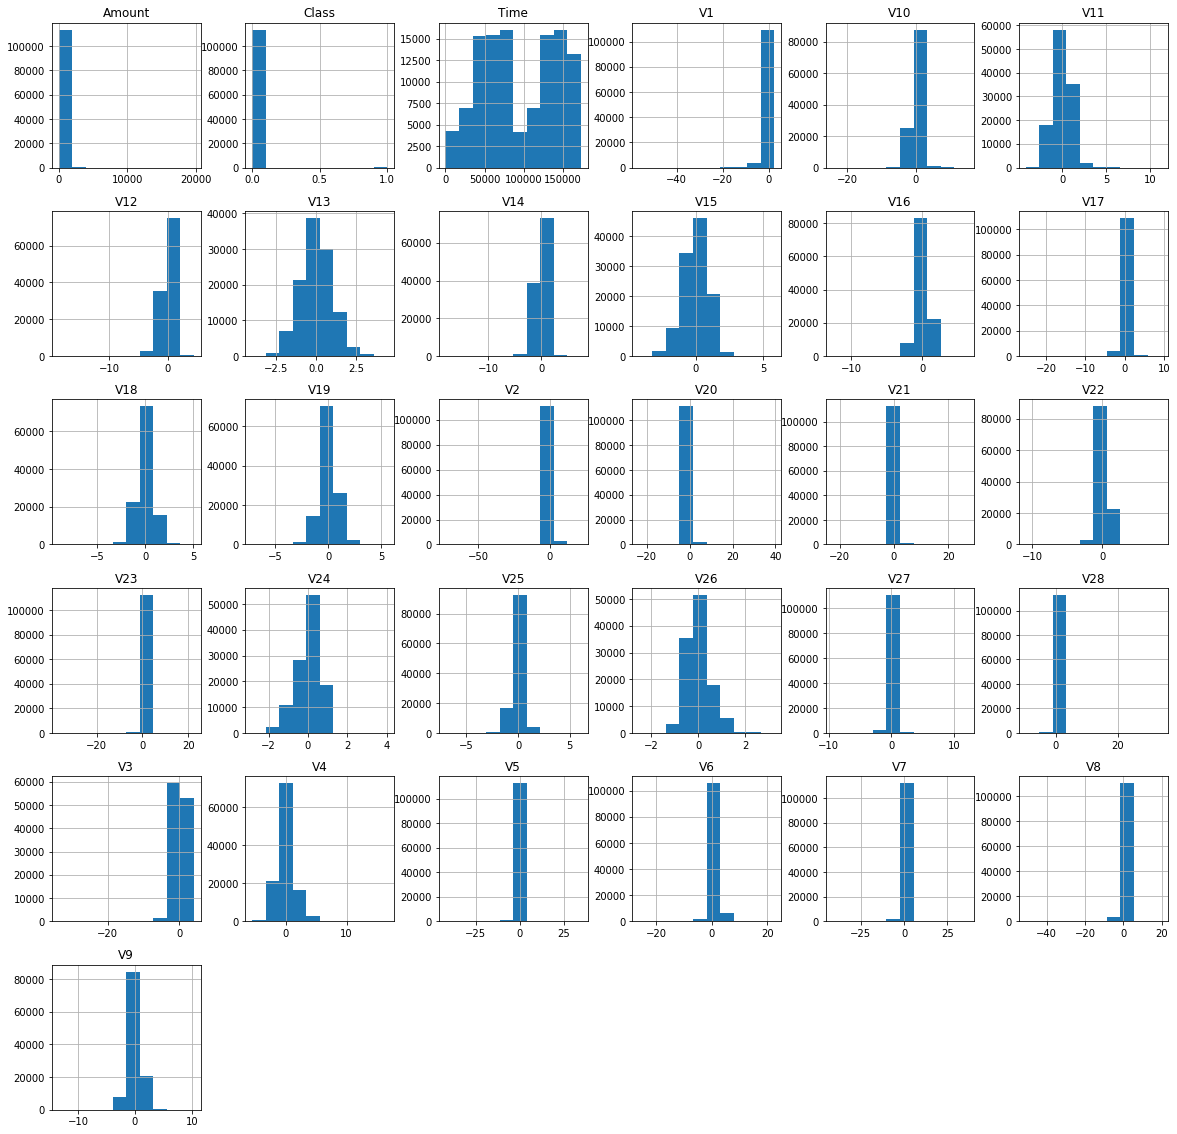

In [43]:
#plot histogram of each dataframe
data.hist(figsize=(20,20))
plt.show()

In [44]:
Fraud=data[data['Class'] == 1]
Valid=data[data['Class'] == 0]
outlier_fraction=len(Fraud)/float(len(Valid))
print(outlier_fraction)
print( 'fraud cases {}'.format(len(Fraud)))
print('valid cases {}'.format(len(Valid)))

0.001635351732505693
fraud cases 186
valid cases 113737


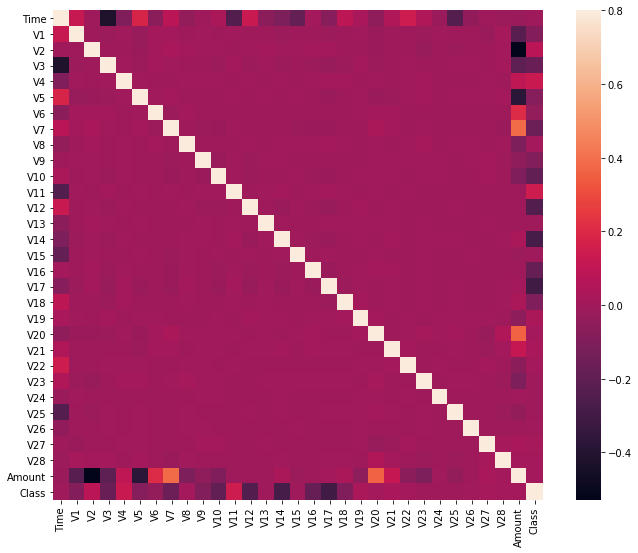

In [45]:
corrmat= data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8,square=True)
plt.show()

In [46]:
columns=data.columns.tolist()

In [47]:
print(columns)


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [48]:
columns=[c for c in columns if c not in ["Class"]]

target="Class"

X=data[columns]
Y=data[target]

In [49]:
print(X.shape)
print(Y.shape)

(113923, 30)
(113923,)


In [50]:
from sklearn.metrics import classification_report , accuracy_score

In [51]:
from sklearn.ensemble import IsolationForest

In [52]:
from sklearn.neighbors import LocalOutlierFactor

In [53]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

AttributeError: decision_function is not available when novelty=False. Use novelty=True if you want to use LOF for novelty detection and compute decision_function for new unseen data. Note that the opposite LOF of the training samples is always available by considering the negative_outlier_factor_ attribute.

In [55]:
n_outliers=len(X)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 259
0.9977265345891523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.30      0.31      0.31       186

    accuracy                           1.00    113923
   macro avg       0.65      0.65      0.65    113923
weighted avg       1.00      1.00      1.00    113923

Local Outlier Factor: 359
0.9968487487162382
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.04      0.04      0.04       186

    accuracy                           1.00    113923
   macro avg       0.52      0.52      0.52    113923
weighted avg       1.00      1.00      1.00    113923

